In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Cross-sectional models and methods.
import statsmodels.api as sm 
# A convenience interface for specifying models using formula strings and DataFrames.
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to deal with missing values via imputation
from sklearn.impute import SimpleImputer

# Function that converts categorical values into numerical values via ordinal encoding or one-hot encoding
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Function to split data into different groups
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import VarianceThreshold

# Statistics functions
from scipy.stats import norm
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.shape

(1460, 81)

In [5]:
df_test.shape

(1459, 80)

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# Drop the 'Id' column from the train set
df_train.drop(["Id"], axis=1, inplace=True)

# Save the list of 'Id' before dropping it from the test set
id_test_list = df_test["Id"].tolist()
df_test.drop(["Id"], axis=1, inplace=True)

In [8]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Numerical Features

In [9]:
df_train_num = df_train.select_dtypes(include=[np.number])
df_test_num = df_test.select_dtypes(include=[np.number])

In [10]:
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


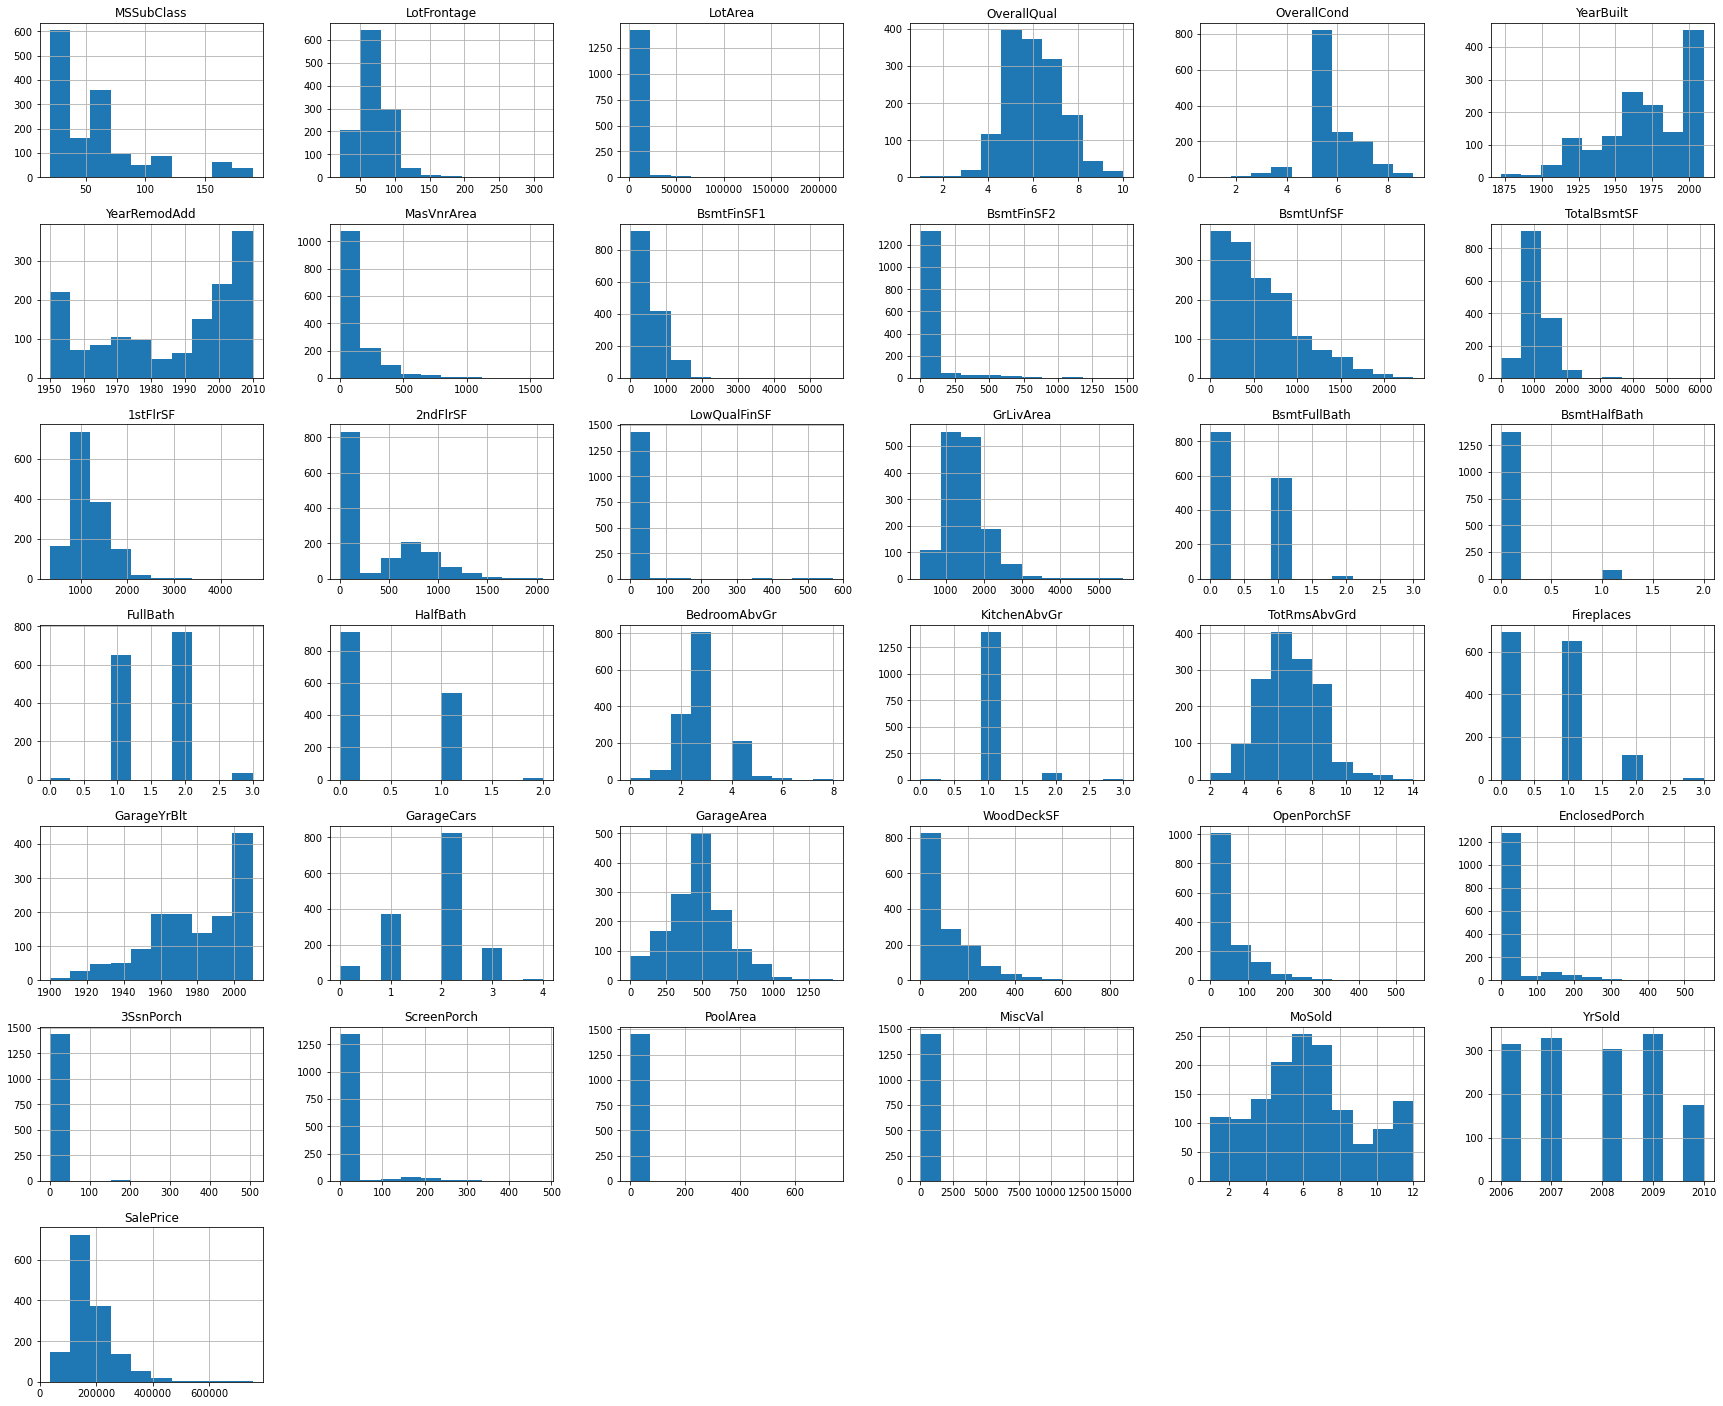

In [11]:
fig_ = df_train_num.hist(figsize=(30, 25))

# Drop quasi-constant variables

In [12]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_train_num.iloc[:, :-1])

# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_train_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_train_num.iloc[:, :-1].columns if x not in df_train_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_train_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 35

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


C:\Users\Julian\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [13]:
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_test_num.iloc[:, :-1])


# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")

print(f"\nNumber of quasi_constant features: {len(df_test_num.iloc[:, :-1].columns) - sum(sel.get_support())}")

quasi_constant_features_list = [x for x in df_test_num.iloc[:, :-1].columns if x not in df_test_num.iloc[:, :-1].columns[sel.get_support()]]

print(f"\nQuasi-constant features to be dropped: {quasi_constant_features_list}")

# Let's drop these columns from df_train_num
df_test_num.drop(quasi_constant_features_list, axis=1, inplace=True)

Number of retained features: 34

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['KitchenAbvGr']


C:\Users\Julian\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Relationships

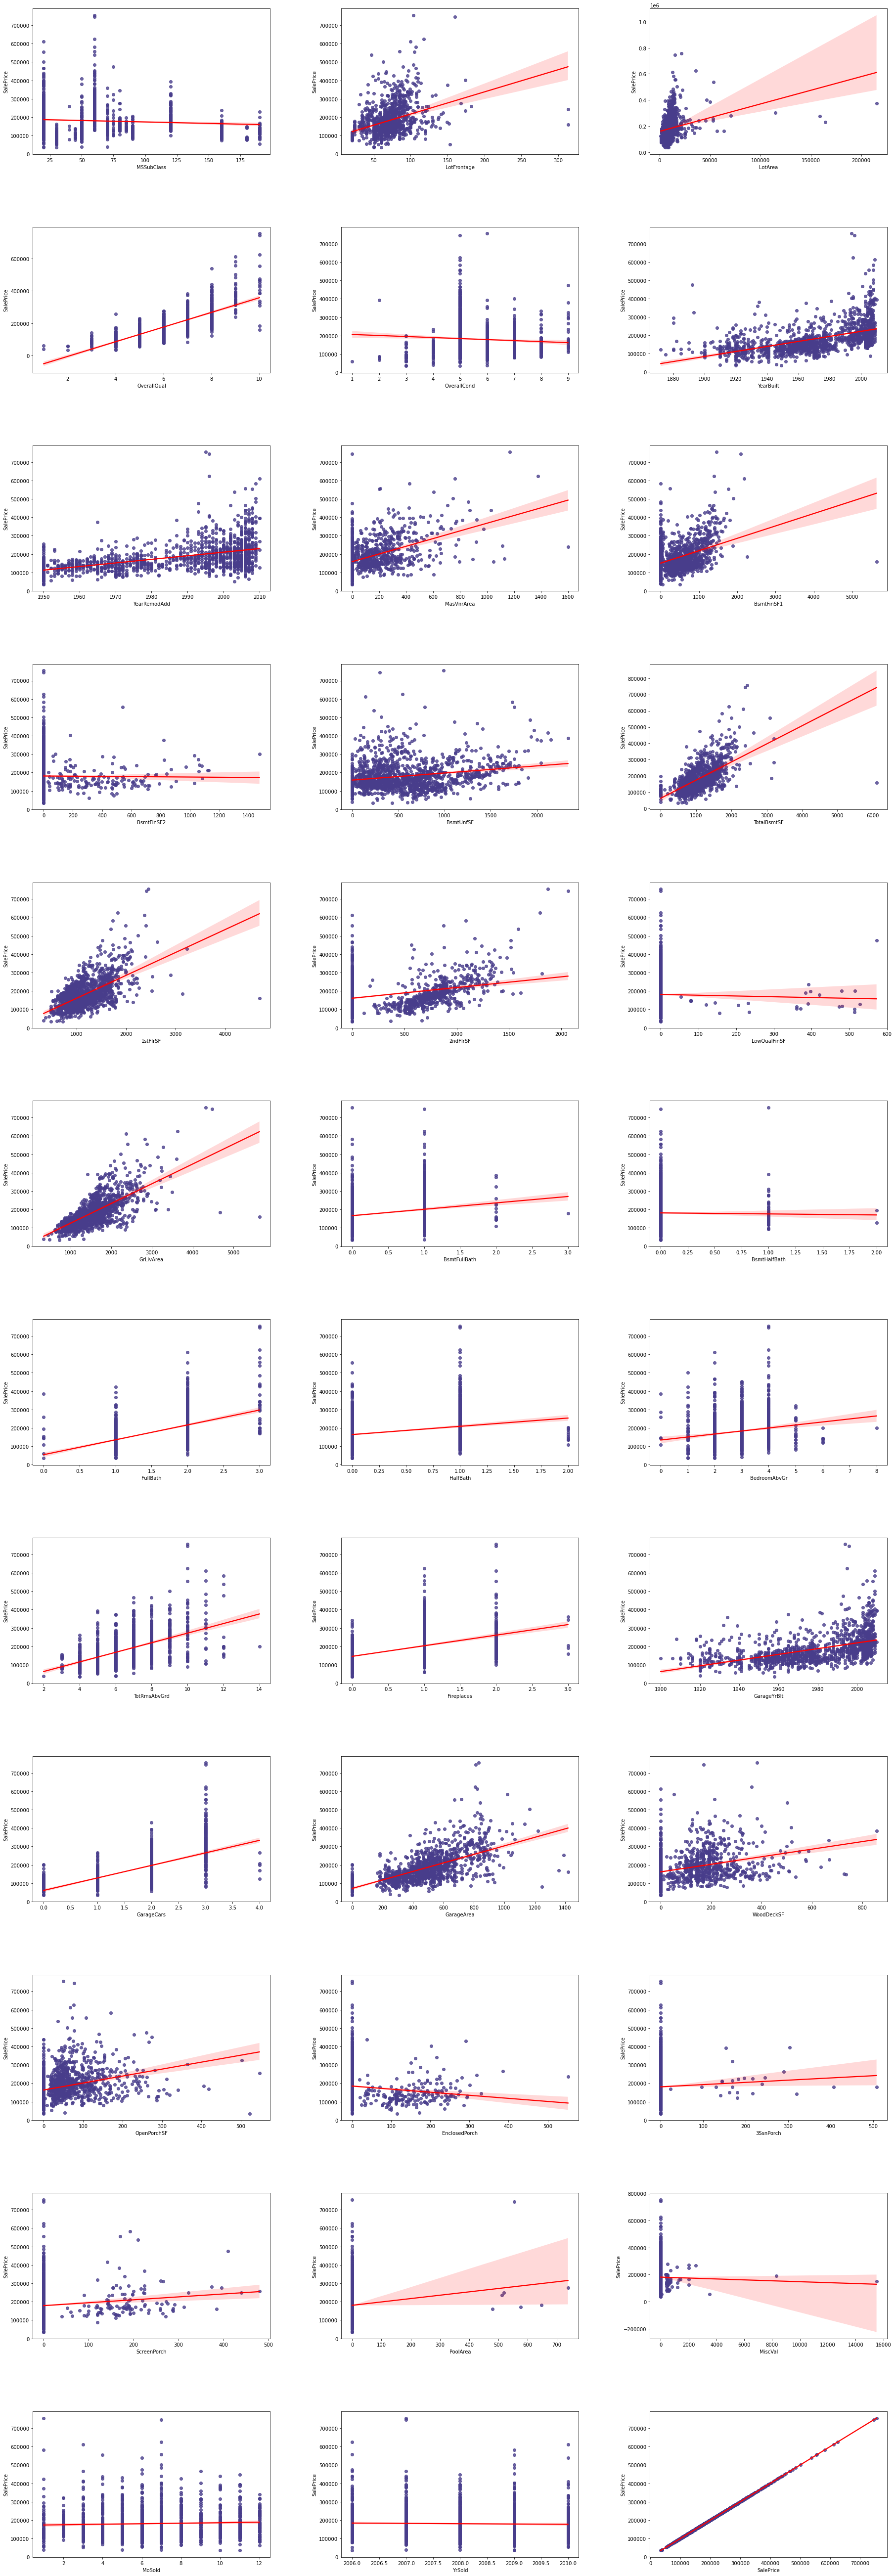

In [14]:
fig = plt.figure(figsize=(30,50))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=1.9,
                    wspace=0.3,
                    hspace=0.5)
for i, col in enumerate(df_train_num.columns):
        plt.subplot(15,3,i+1)
        sns.regplot(x=col, y= "SalePrice", data=df_train_num, scatter_kws={"color": "darkslateblue"}, line_kws={"color": "red"})

# Correlation

<AxesSubplot:>

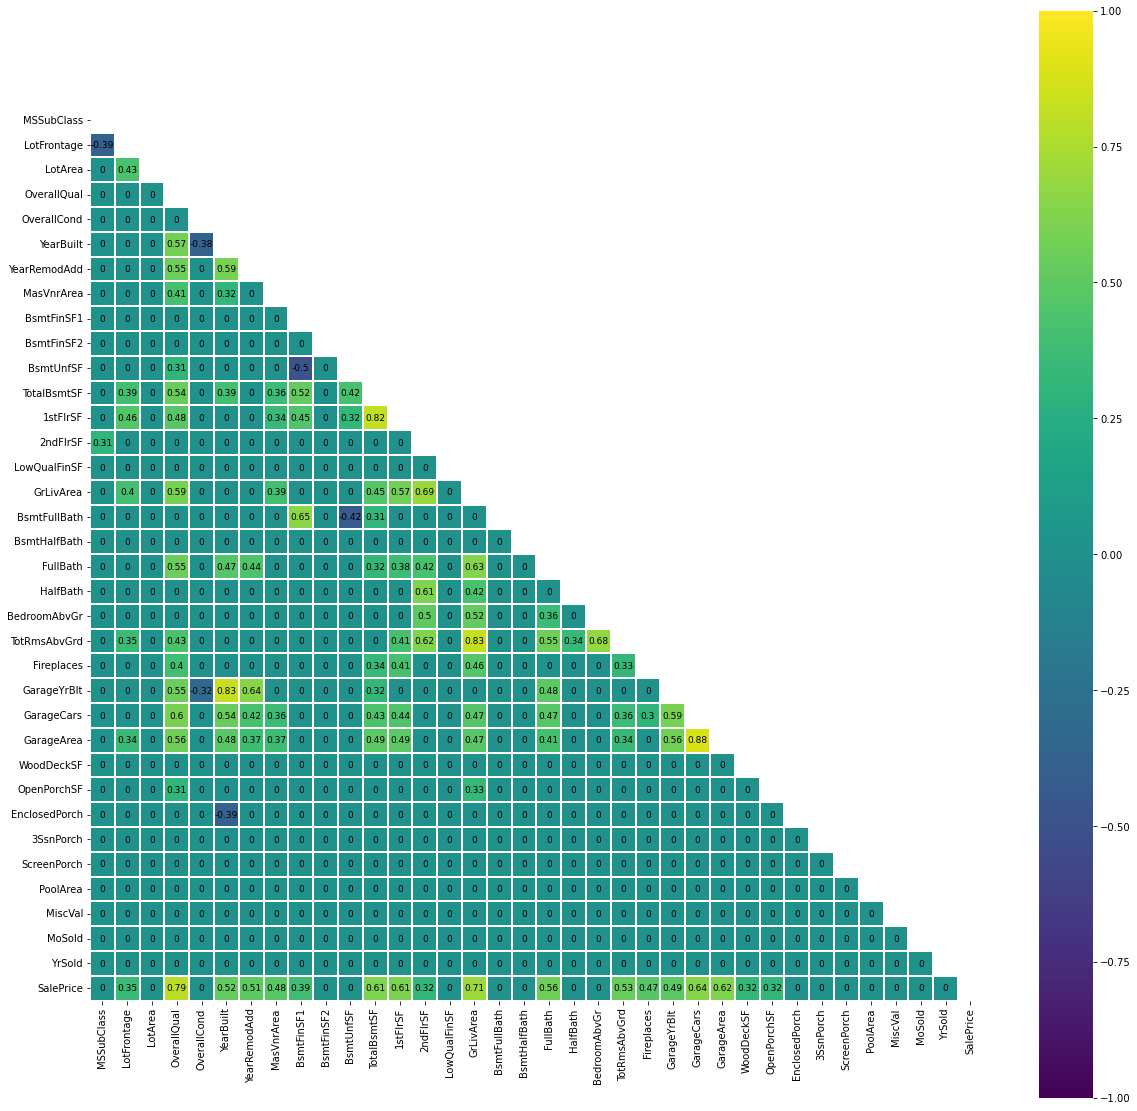

In [15]:
# Heatmap for all the remaining numerical data including the taget 'SalePrice'

# Define the heatmap parameters
pd.options.display.float_format = "{:,.2f}".format

# Define correlation matrix 
# (method = pearson: standard correlation coefficient)
corr_matrix = df_train_num.corr(method = 'pearson')

# Replace correlation < |0.3| by 0 for a better visibility
corr_matrix[(corr_matrix < 0.3) & (corr_matrix > -0.3)] = 0

# Mask the upper part of the heatmap
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Choose the color map
cmap = "viridis"

# plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, mask=mask, vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot_kws={"size": 9, "color": "black"}, square=True, cmap=cmap, annot=True)

In [16]:
df_num_corr = df_train_num.corr()["SalePrice"][:-1]
df_num_corr

MSSubClass      -0.08
LotFrontage      0.35
LotArea          0.26
OverallQual      0.79
OverallCond     -0.08
YearBuilt        0.52
YearRemodAdd     0.51
MasVnrArea       0.48
BsmtFinSF1       0.39
BsmtFinSF2      -0.01
BsmtUnfSF        0.21
TotalBsmtSF      0.61
1stFlrSF         0.61
2ndFlrSF         0.32
LowQualFinSF    -0.03
GrLivArea        0.71
BsmtFullBath     0.23
BsmtHalfBath    -0.02
FullBath         0.56
HalfBath         0.28
BedroomAbvGr     0.17
TotRmsAbvGrd     0.53
Fireplaces       0.47
GarageYrBlt      0.49
GarageCars       0.64
GarageArea       0.62
WoodDeckSF       0.32
OpenPorchSF      0.32
EnclosedPorch   -0.13
3SsnPorch        0.04
ScreenPorch      0.11
PoolArea         0.09
MiscVal         -0.02
MoSold           0.05
YrSold          -0.03
Name: SalePrice, dtype: float64

In [17]:
#################################
# Correlated features (r2 > 0.7)
strong_features_list = df_num_corr[abs(df_num_corr) >= 0.7].sort_values(ascending=False)
print(f"{len(strong_features_list)} strongly correlated values with SalePrice:\n{strong_features_list}\n")

strong_features = df_num_corr[abs(df_num_corr) >= 0.7].index.tolist()
strong_features.append("SalePrice")

df_strong_features = df_train_num.loc[:, strong_features]

######################################
# Correlated features (0.5 < r2 < 0.7)
moderate_features_list = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].sort_values(ascending=False)
print(f"{len(moderate_features_list)} moderately correlated values with SalePrice:\n{moderate_features_list}\n")

moderate_features = df_num_corr[(abs(df_num_corr) < 0.7) & (abs(df_num_corr) >= 0.5)].index.tolist()
moderate_features.append("SalePrice")

df_moderate_features = df_train_num.loc[:, moderate_features]

######################################
# Correlated features (0.3 < r2 < 0.5)
weak_features_list = df_num_corr[(abs(df_num_corr) < 0.5) & (abs(df_num_corr) >= 0.3)].sort_values(ascending=False)
print(f"{len(weak_features_list)} weakly correlated values with SalePrice:\n{weak_features_list}")

weak_features = df_num_corr[(abs(df_num_corr) >= 0.3) & (abs(df_num_corr) < 0.5)].index.tolist()
weak_features.append("SalePrice")

df_weak_features = df_train_num.loc[:, weak_features]

2 strongly correlated values with SalePrice:
OverallQual   0.79
GrLivArea     0.71
Name: SalePrice, dtype: float64

8 moderately correlated values with SalePrice:
GarageCars     0.64
GarageArea     0.62
TotalBsmtSF    0.61
1stFlrSF       0.61
FullBath       0.56
TotRmsAbvGrd   0.53
YearBuilt      0.52
YearRemodAdd   0.51
Name: SalePrice, dtype: float64

8 weakly correlated values with SalePrice:
GarageYrBlt   0.49
MasVnrArea    0.48
Fireplaces    0.47
BsmtFinSF1    0.39
LotFrontage   0.35
WoodDeckSF    0.32
2ndFlrSF      0.32
OpenPorchSF   0.32
Name: SalePrice, dtype: float64


In [18]:
# Define the list of numerical fetaures to keep
list_of_numerical_features = strong_features[:-1] + moderate_features[:-1] + weak_features
print(list_of_numerical_features)

['OverallQual', 'GrLivArea', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'LotFrontage', 'MasVnrArea', 'BsmtFinSF1', '2ndFlrSF', 'Fireplaces', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']


In [19]:
df_train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.00,8450,7,5,2003,2003,196.00,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.00,9600,6,8,1976,1976,0.00,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.00,11250,7,5,2001,2002,162.00,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.00,9550,7,5,1915,1970,0.00,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.00,14260,8,5,2000,2000,350.00,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [20]:
# Let's select these features form our train set
df_train_num = df_train_num.loc[:, list_of_numerical_features]

# The same features are selected from the test set (-1 -> except 'SalePrice')
df_test_num = df_test.loc[:, list_of_numerical_features[:-1]]

# Display except the last column
df_train_num.iloc[:, :-1].head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF,OpenPorchSF
0,7,1710,2003,2003,856,856,2,8,2,548,65.00,196.00,706,854,0,"2,003.00",0,61
1,6,1262,1976,1976,1262,1262,2,6,2,460,80.00,0.00,978,0,1,"1,976.00",298,0
2,7,1786,2001,2002,920,920,2,6,2,608,68.00,162.00,486,866,1,"2,001.00",0,42
3,7,1717,1915,1970,756,961,1,7,3,642,60.00,0.00,216,756,1,"1,998.00",0,35
4,8,2198,2000,2000,1145,1145,2,9,3,836,84.00,350.00,655,1053,1,"2,000.00",192,84


In [21]:
# Display except the last column
df_test_num.iloc[:, :-1].head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,GarageYrBlt,WoodDeckSF
0,5,896,1961,1961,882.00,896,1,5,1.00,730.00,80.00,0.00,468.00,0,0,"1,961.00",140
1,6,1329,1958,1958,"1,329.00",1329,1,6,1.00,312.00,81.00,108.00,923.00,0,0,"1,958.00",393
2,5,1629,1997,1998,928.00,928,2,6,2.00,482.00,74.00,0.00,791.00,701,1,"1,997.00",212
3,6,1604,1998,1998,926.00,926,2,7,2.00,470.00,78.00,20.00,602.00,678,1,"1,998.00",360
4,8,1280,1992,1992,"1,280.00",1280,2,5,2.00,506.00,43.00,0.00,263.00,0,0,"1,992.00",0


In [22]:
# Strongly Correlated Features
XSC = ["GarageCars", "GarageYrBlt", "1stFlrSF", "TotRmsAbvGrd"]

# Training set
for i, col in enumerate(XSC):
    if col in df_train_num.columns:
        df_train_num.drop(col, axis=1, inplace=True)

# Testing set
for i, col in enumerate(XSC):
    if col in df_test_num.columns:
        df_test_num.drop(col, axis=1, inplace=True)

In [23]:
df_train_num.iloc[:, :-1].shape

(1460, 14)

In [24]:
df_test_num.iloc[:, :-1].shape

(1459, 13)

# Missing Data

Index(['LotFrontage', 'MasVnrArea'], dtype='object')


Text(0, 0.5, 'Column Name\n')

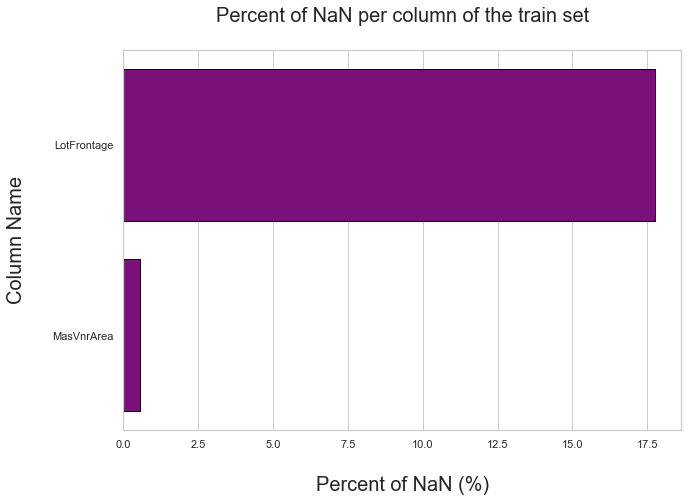

In [25]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df_train_num.columns[df_train_num.isnull().any()]
print(column_with_nan)

column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_num[i].isnull().sum()*100/len(df_train_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the train set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [26]:
my_imputer = SimpleImputer(strategy='median')
df_train_imputed = pd.DataFrame(my_imputer.fit_transform(df_train_num))
df_train_imputed.columns = df_train_num.columns

In [27]:
df_train_imputed

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,2ndFlrSF,Fireplaces,WoodDeckSF,OpenPorchSF,SalePrice
0,7.00,"1,710.00","2,003.00","2,003.00",856.00,2.00,548.00,65.00,196.00,706.00,854.00,0.00,0.00,61.00,"208,500.00"
1,6.00,"1,262.00","1,976.00","1,976.00","1,262.00",2.00,460.00,80.00,0.00,978.00,0.00,1.00,298.00,0.00,"181,500.00"
2,7.00,"1,786.00","2,001.00","2,002.00",920.00,2.00,608.00,68.00,162.00,486.00,866.00,1.00,0.00,42.00,"223,500.00"
3,7.00,"1,717.00","1,915.00","1,970.00",756.00,1.00,642.00,60.00,0.00,216.00,756.00,1.00,0.00,35.00,"140,000.00"
4,8.00,"2,198.00","2,000.00","2,000.00","1,145.00",2.00,836.00,84.00,350.00,655.00,"1,053.00",1.00,192.00,84.00,"250,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6.00,"1,647.00","1,999.00","2,000.00",953.00,2.00,460.00,62.00,0.00,0.00,694.00,1.00,0.00,40.00,"175,000.00"
1456,6.00,"2,073.00","1,978.00","1,988.00","1,542.00",2.00,500.00,85.00,119.00,790.00,0.00,2.00,349.00,0.00,"210,000.00"
1457,7.00,"2,340.00","1,941.00","2,006.00","1,152.00",2.00,252.00,66.00,0.00,275.00,"1,152.00",2.00,0.00,60.00,"266,500.00"
1458,5.00,"1,078.00","1,950.00","1,996.00","1,078.00",1.00,240.00,68.00,0.00,49.00,0.00,0.00,366.00,0.00,"142,125.00"


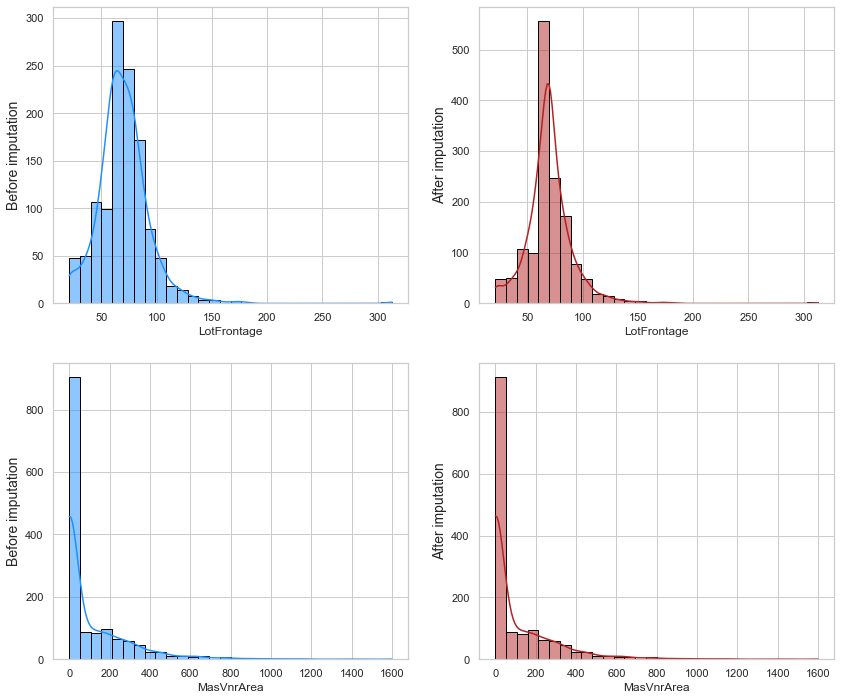

In [28]:
# Define figure parameters
sns.set(rc={"figure.figsize": (14, 12)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(2, 2)

# Plot the results
for feature, fig_pos in zip(["LotFrontage", "MasVnrArea"], [0, 1]):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_train_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_train_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black")
    q.set_ylabel(f"After imputation", fontsize=14)

Text(0, 0.5, 'Column Name\n')

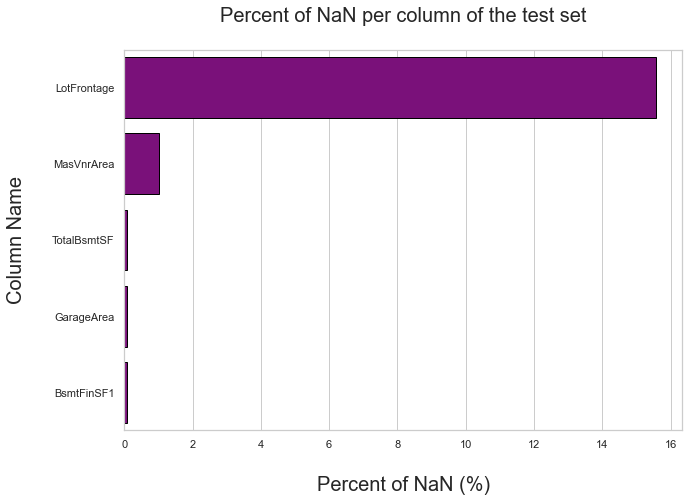

In [29]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_num.columns[df_test_num.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_num[i].isnull().sum()*100/len(df_test_num), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="darkmagenta")

p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [30]:
my_imputer = SimpleImputer(strategy='median')
df_test_imputed = pd.DataFrame(my_imputer.fit_transform(df_test_num))
df_test_imputed.columns = df_test_num.columns

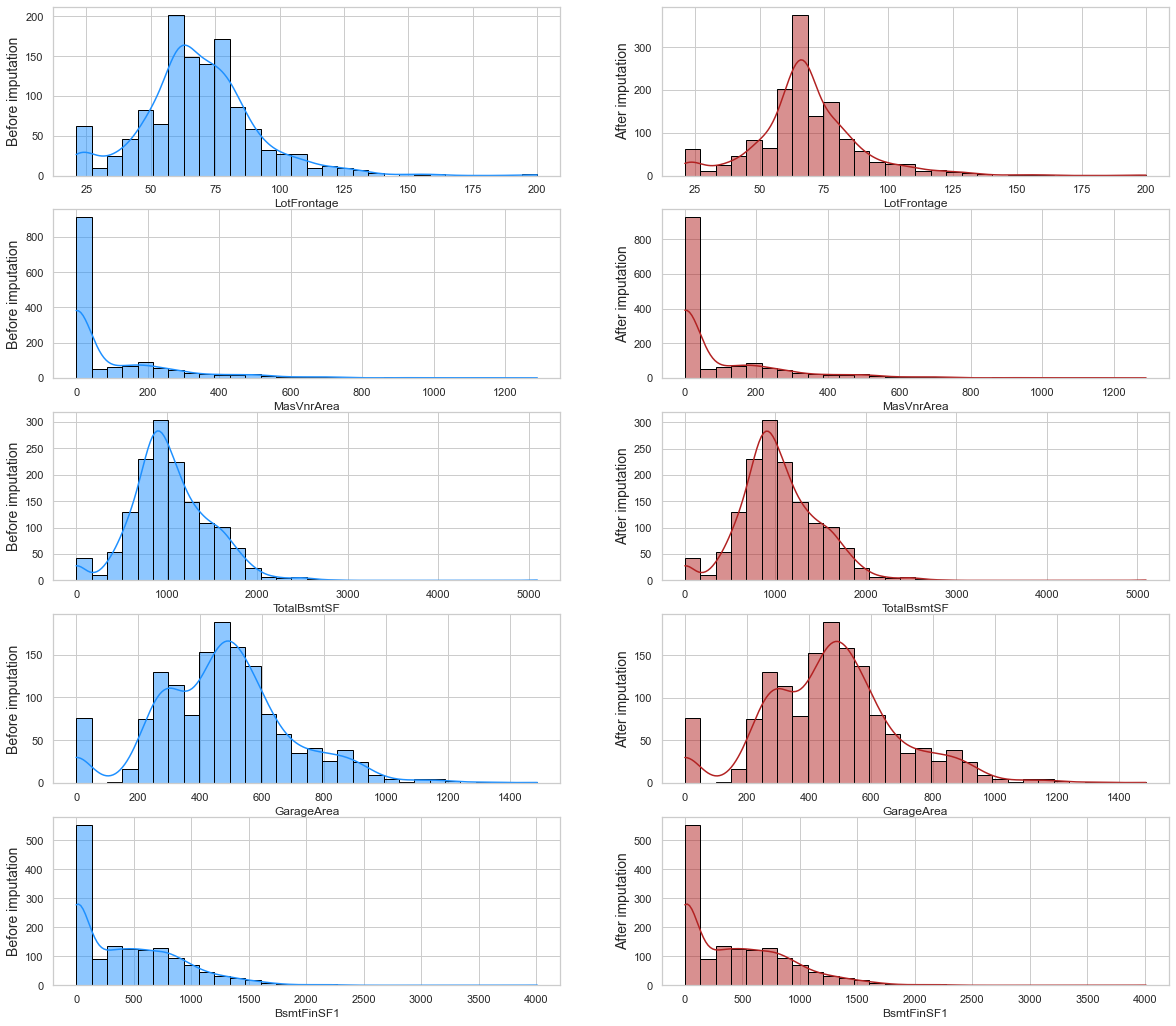

In [31]:
# Let's check the distribution of each imputed feature before and after imputation
# Define figure parameters
sns.set(rc={"figure.figsize": (20, 18)})
sns.set_style("whitegrid")
fig, axes = plt.subplots(5, 2)

# Plot the results
for feature, fig_pos in zip(tab["Column"].tolist(), range(0, 5)):

    """Features distribution before and after imputation"""

    # before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df_test_num[feature],
                     kde=True, bins=30, color="dodgerblue", edgecolor="black")
    p.set_ylabel(f"Before imputation", fontsize=14)

    # after imputation
    q = sns.histplot(ax=axes[fig_pos, 1], x=df_test_imputed[feature],
                     kde=True, bins=30, color="firebrick", edgecolor="black",)
    q.set_ylabel(f"After imputation", fontsize=14)

# Categorical Data

In [32]:
# Categorical to Quantitative relationship
categorical_features = [i for i in df_train.columns if df_train.dtypes[i] == "object"]
categorical_features.append("SalePrice")

# Train set
df_train_categ = df_train[categorical_features]

# Test set (-1 because test set don't have 'Sale Price')
df_test_categ = df_test[categorical_features[:-1]]

df_train_categ.shape

(1460, 44)

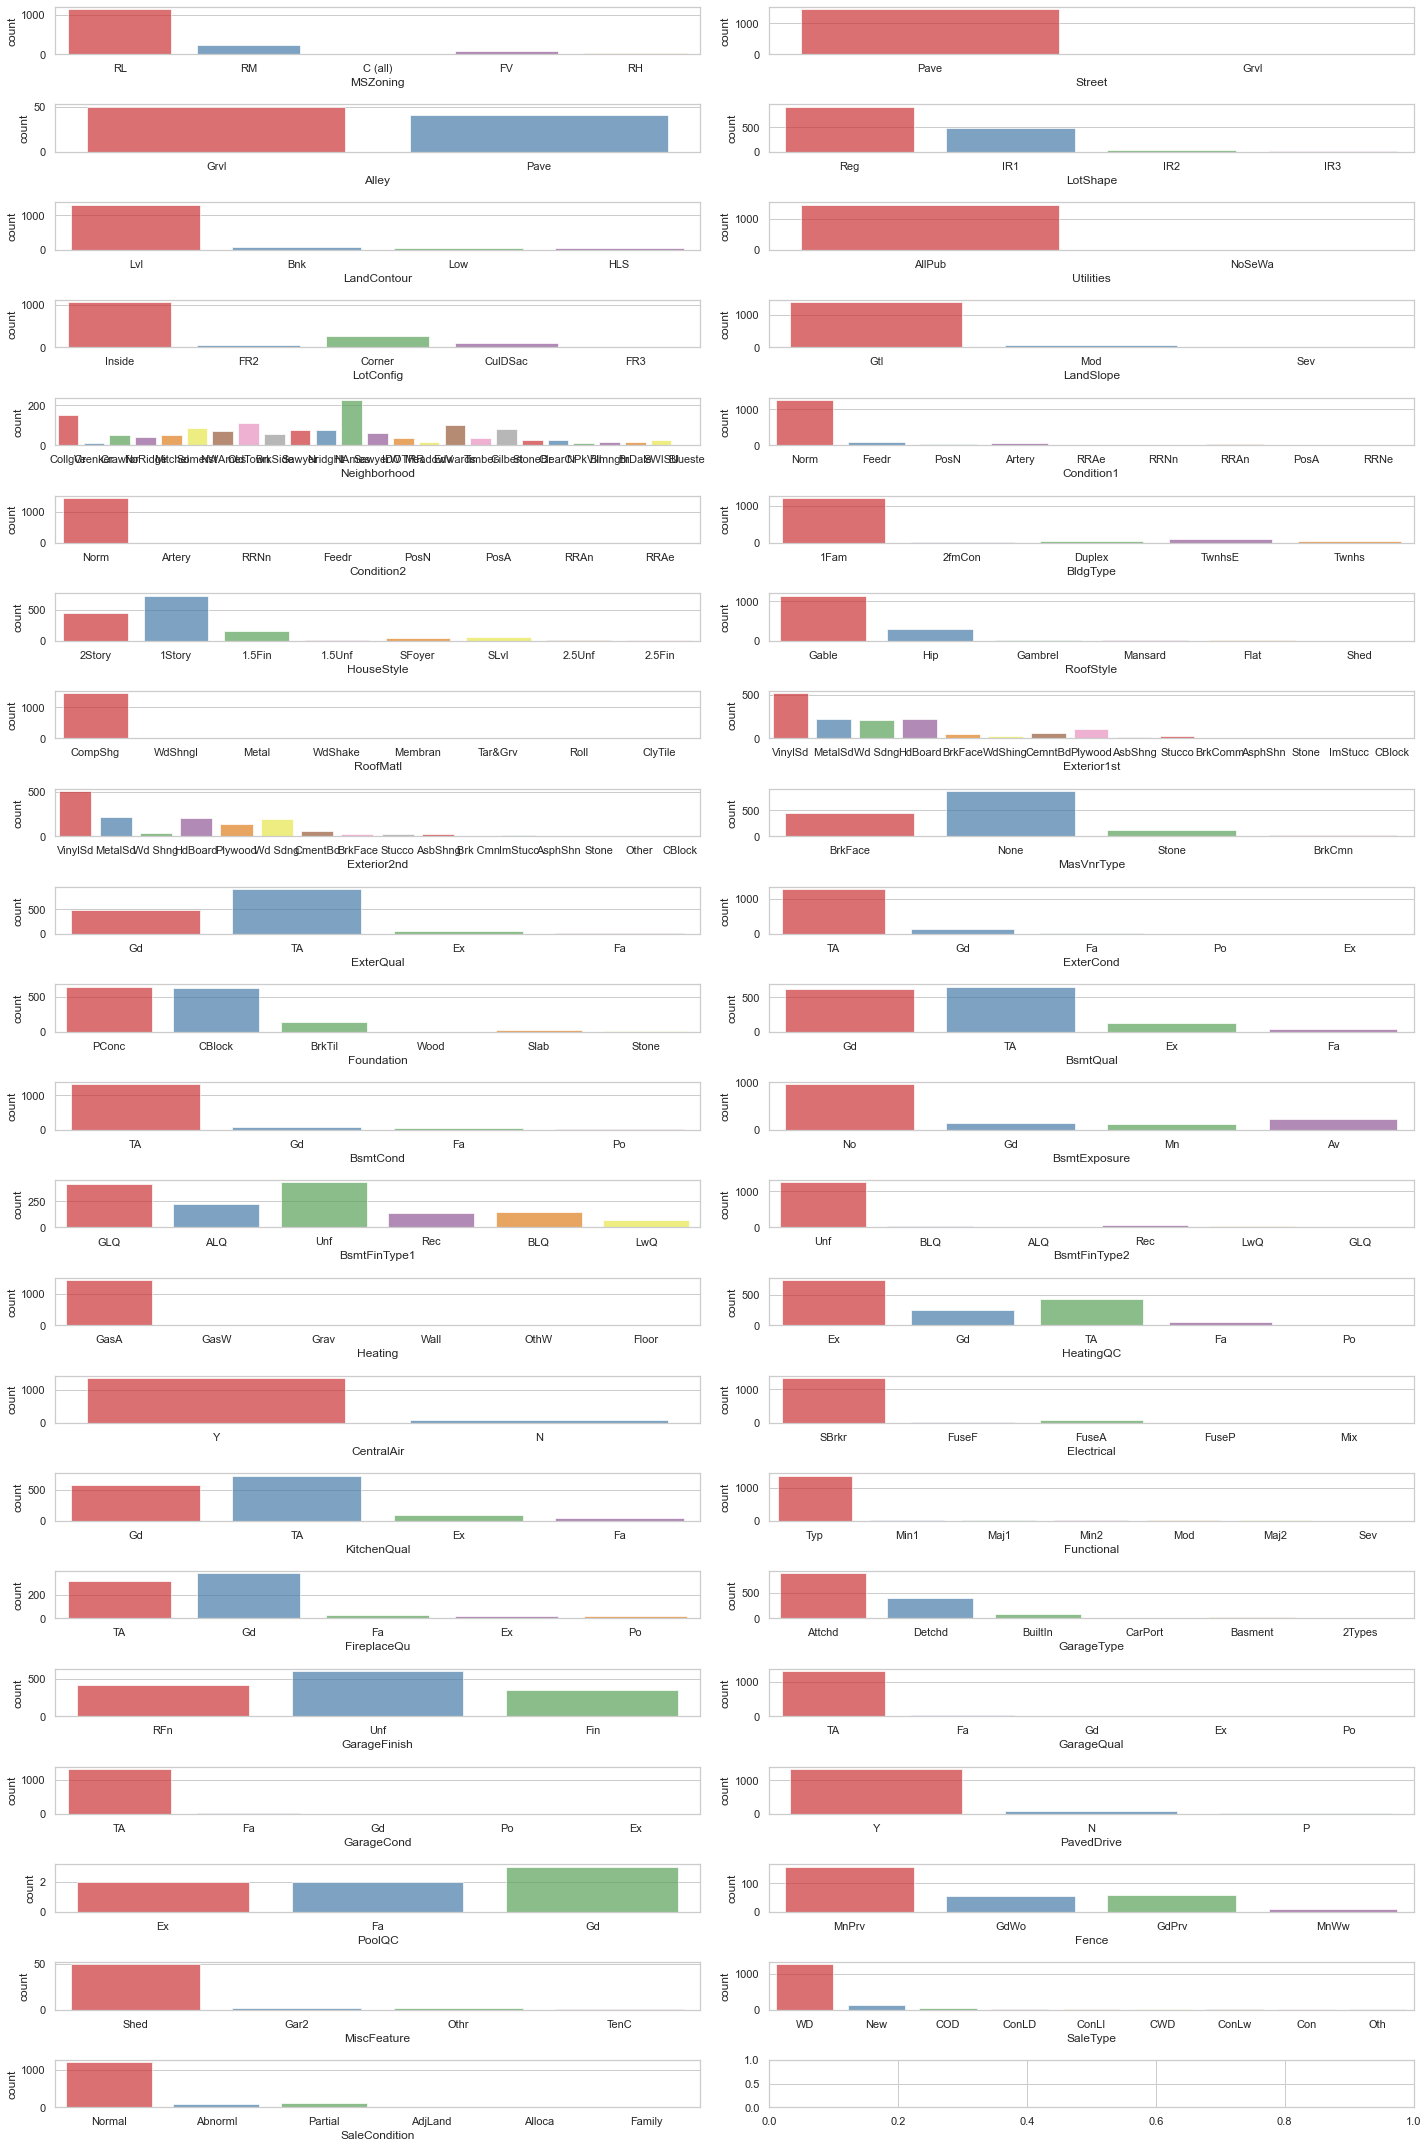

In [33]:
fig, axes = plt.subplots(round(len(df_train_categ.columns) / 2), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot barplot of each feature
    if i < len(df_train_categ.columns) - 1:
        #ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
        sns.countplot(x=df_train_categ.columns[i], alpha=0.7, data=df_train_categ, ax=ax, palette = "Set1")

fig.tight_layout()

In [34]:
cols_to_drop = [
    'Street',
    'LandContour',
    'Utilities',
    'LandSlope',
    'Condition2',
    'RoofMatl',
    'BsmtCond',
    'BsmtFinType2',
    'Heating',
    'CentralAir',
    'Electrical',
    'Functional',
    'GarageQual',
    'GarageCond',
    'PavedDrive'
]

# Training set
df_train_categ.drop(cols_to_drop, axis=1, inplace=True)

# Test set
df_test_categ.drop(cols_to_drop, axis=1, inplace=True)

C:\Users\Julian\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [35]:
df_train_categ.shape

(1460, 29)

In [36]:
df_test_categ.shape

(1459, 28)

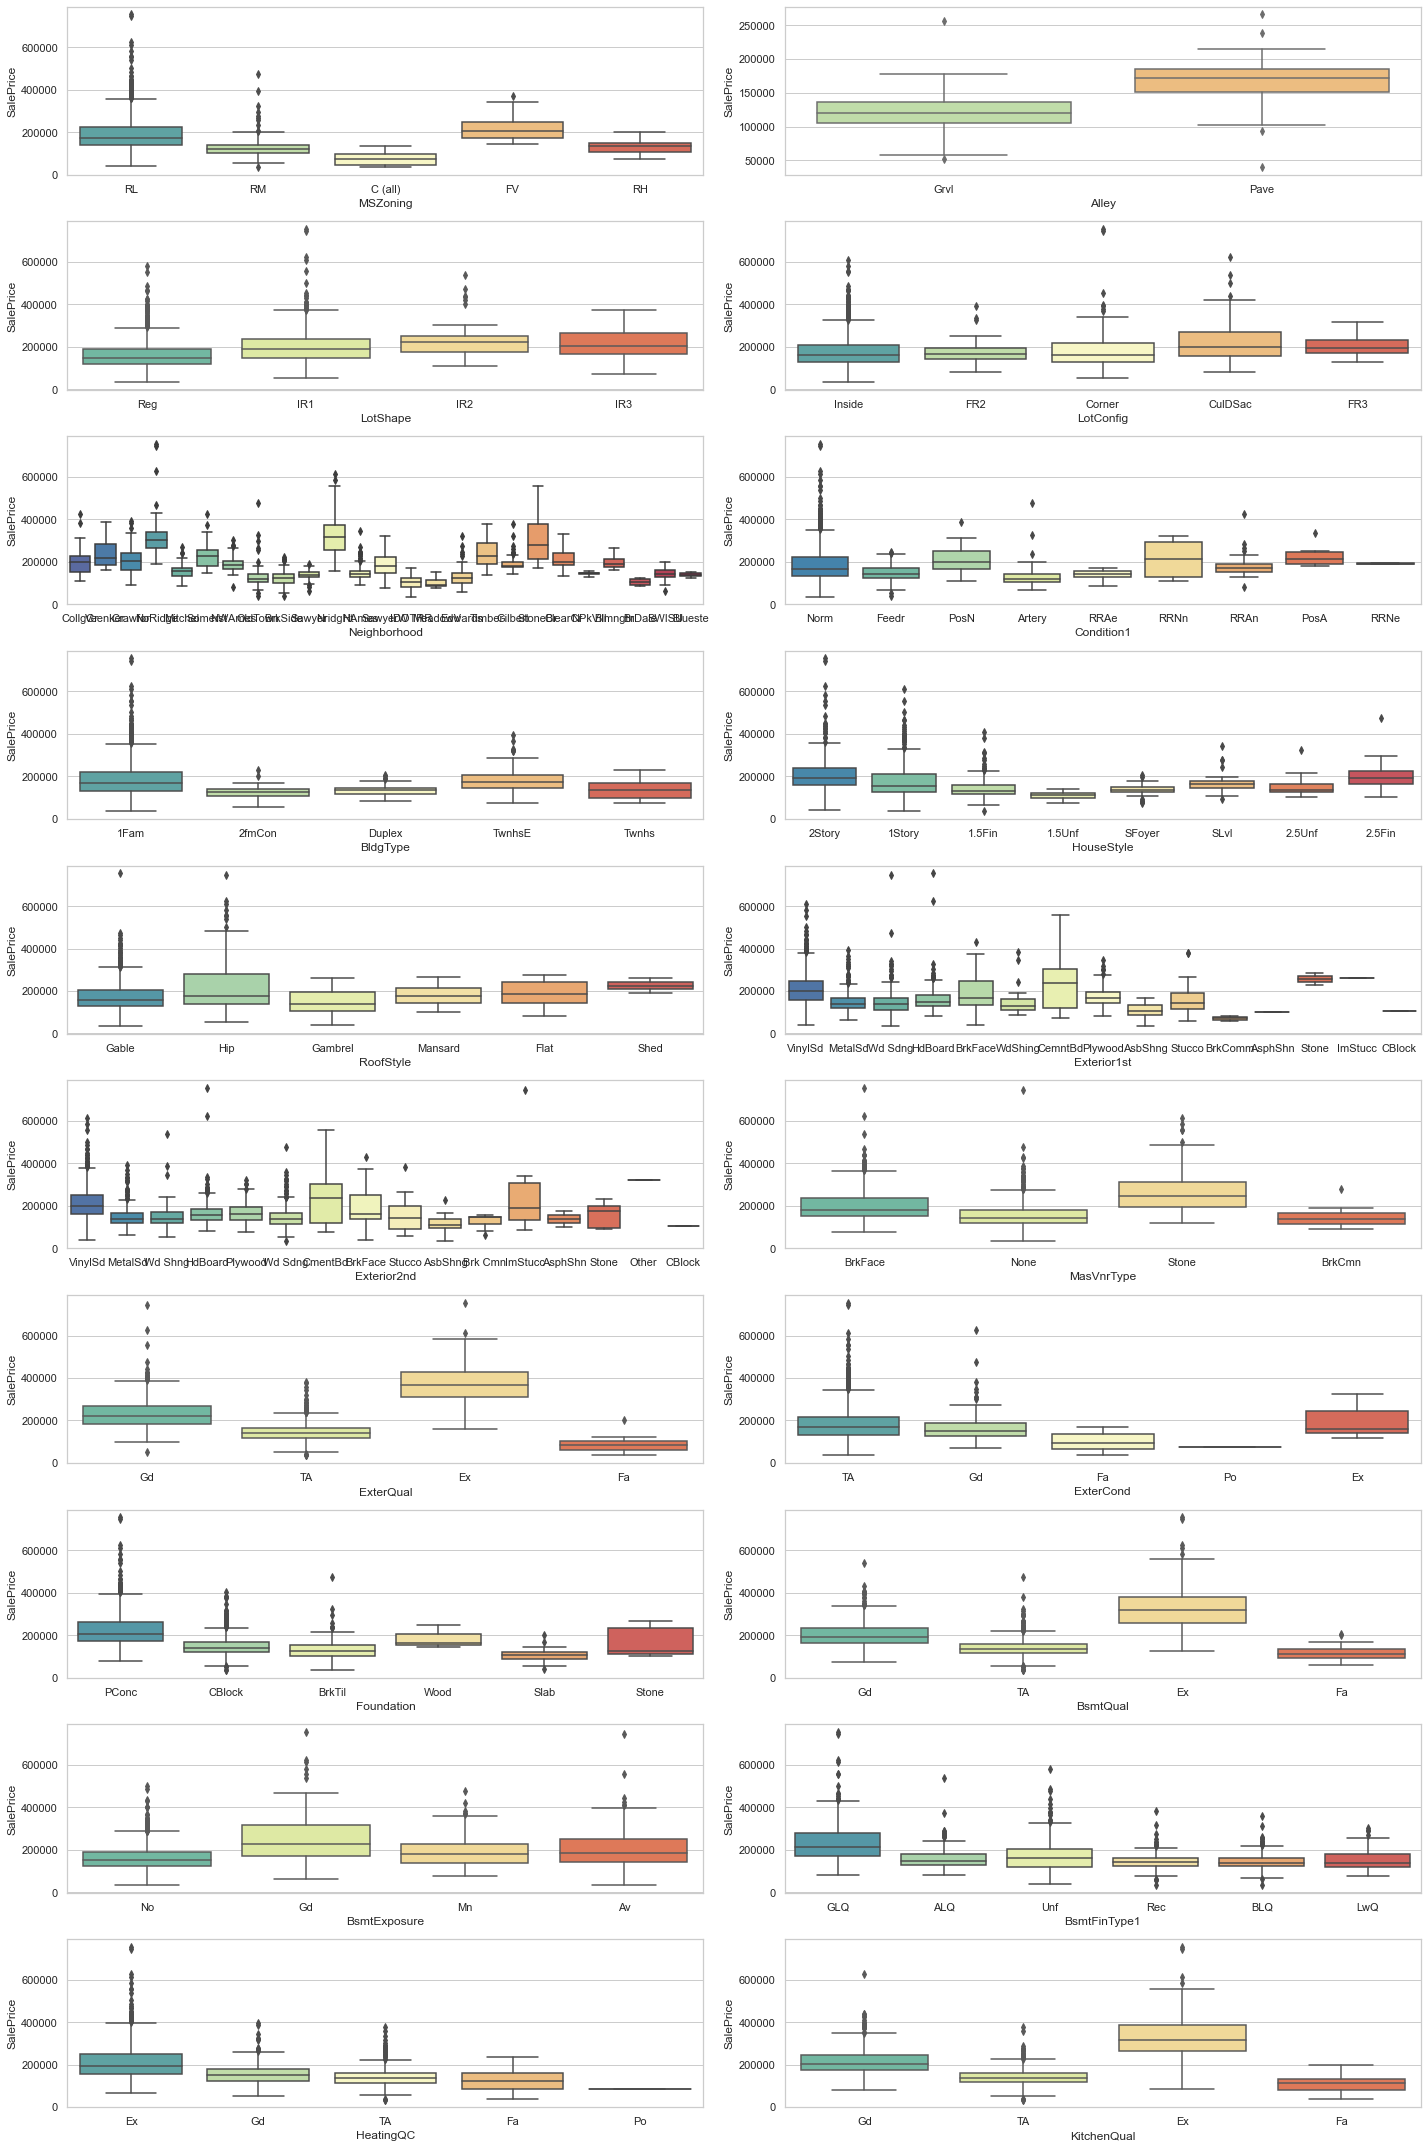

In [37]:
fig, axes = plt.subplots(
    round(len(df_train_categ.columns)/3), 2, figsize=(20, 30))

for i, ax in enumerate(fig.axes):
    # plot the variation of SalePrice in each feature
    if i < len(df_train_categ.columns) - 1:
        # ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=75)
        sns.boxplot(x=df_train_categ.columns[i], y="SalePrice", data=df_train_categ, ax=ax, palette="Spectral_r")

fig.tight_layout()

# Chi-squared test for independence

In [38]:
# Plot contingency table

sns.set(rc={"figure.figsize": (10, 7)})

X = ["Exterior1st", "ExterQual", "BsmtQual"]
Y = ["Exterior2nd", "MasVnrType", "BsmtExposure"]

for i, j in zip(X, Y):

#     # Contingency table
#     cont = df_train_categ[[i, j]].pivot_table(
#         index=i, columns=j, aggfunc=len, margins=True, margins_name="Total")
#     tx = cont.loc[:, ["Total"]]
#     ty = cont.loc[["Total"], :]
#     n = len(df_train_categ)
#     indep = tx.dot(ty) / n
#     c = cont.fillna(0)  # Replace NaN with 0 in the contingency table
#     measure = (c - indep) ** 2 / indep
#     xi_n = measure.sum().sum()
#     table = measure / xi_n

#     # Plot contingency table
#     p = sns.heatmap(table.iloc[:-1, :-1],
#                     annot=c.iloc[:-1, :-1], fmt=".0f", cmap="Oranges")
#     p.set_xlabel(j, fontsize=18)
#     p.set_ylabel(i, fontsize=18)
#     p.set_title(f"\nχ² test between groups {i} and groups {j}\n", size=18)
#     plt.show()

    # Performing Chi-sq test
    CrosstabResult = pd.crosstab(
        index=df_train_categ[i], columns=df_train_categ[j])
    ChiSqResult = chi2_contingency(CrosstabResult)
    # P-Value is the Probability of H0 being True
    print(
        f"P-Value of the ChiSq Test bewteen {i} and {j} is: {ChiSqResult[1]}\n")

P-Value of the ChiSq Test bewteen Exterior1st and Exterior2nd is: 0.0

P-Value of the ChiSq Test bewteen ExterQual and MasVnrType is: 1.0187554679218715e-54

P-Value of the ChiSq Test bewteen BsmtQual and BsmtExposure is: 3.879215036512606e-32



In [39]:
# Drop the one of each co-dependent variables
# Training set
df_train_categ.drop(Y, axis=1, inplace=True)

# Test set
df_test_categ.drop(Y, axis=1, inplace=True)

C:\Users\Julian\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Missing Data

Text(0, 0.5, 'Column Name\n')

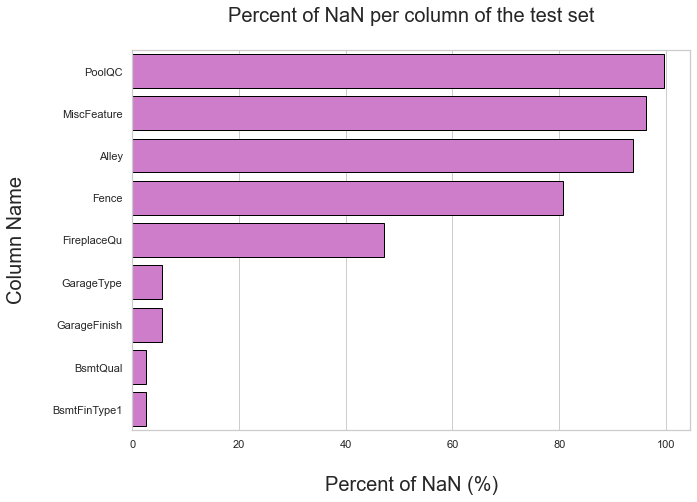

In [40]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_train_categ.columns[df_train_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_train_categ[i].isnull().sum() * 100 / len(df_train_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [41]:
tab

,Column,Percent_NaN
6,PoolQC,99.52
8,MiscFeature,96.30
0,Alley,93.77
7,Fence,80.75
3,FireplaceQu,47.26
4,GarageType,5.55
5,GarageFinish,5.55
1,BsmtQual,2.53
2,BsmtFinType1,2.53


In [42]:
# Drop categorical columns that have at least 30% missing values
large_na = [col for col in column_with_nan if (df_train_categ[col].isna().sum()/df_train_categ.shape[0]) > 0.3]

print("Columns to be dropped:")
print(large_na)

df_train_categ.drop(large_na, axis=1, inplace=True)
df_test_categ.drop(large_na, axis=1, inplace=True)

Columns to be dropped:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


C:\Users\Julian\Anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [43]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": df_train_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_train_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_train_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_train_categ["BsmtFinType1"].mode().iloc[0]}

df_train_categ = df_train_categ.fillna(value=categ_fill_null)


In [44]:
df_train_categ

,MSZoning,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,ExterQual,...,Foundation,BsmtQual,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish,SaleType,SaleCondition,SalePrice
0,RL,Reg,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,Gd,...,PConc,Gd,GLQ,Ex,Gd,Attchd,RFn,WD,Normal,208500
1,RL,Reg,FR2,Veenker,Feedr,1Fam,1Story,Gable,MetalSd,TA,...,CBlock,Gd,ALQ,Ex,TA,Attchd,RFn,WD,Normal,181500
2,RL,IR1,Inside,CollgCr,Norm,1Fam,2Story,Gable,VinylSd,Gd,...,PConc,Gd,GLQ,Ex,Gd,Attchd,RFn,WD,Normal,223500
3,RL,IR1,Corner,Crawfor,Norm,1Fam,2Story,Gable,Wd Sdng,TA,...,BrkTil,TA,ALQ,Gd,Gd,Detchd,Unf,WD,Abnorml,140000
4,RL,IR1,FR2,NoRidge,Norm,1Fam,2Story,Gable,VinylSd,Gd,...,PConc,Gd,GLQ,Ex,Gd,Attchd,RFn,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Reg,Inside,Gilbert,Norm,1Fam,2Story,Gable,VinylSd,TA,...,PConc,Gd,Unf,Ex,TA,Attchd,RFn,WD,Normal,175000
1456,RL,Reg,Inside,NWAmes,Norm,1Fam,1Story,Gable,Plywood,TA,...,CBlock,Gd,ALQ,TA,TA,Attchd,Unf,WD,Normal,210000
1457,RL,Reg,Inside,Crawfor,Norm,1Fam,2Story,Gable,CemntBd,Ex,...,Stone,TA,GLQ,Ex,Gd,Attchd,RFn,WD,Normal,266500
1458,RL,Reg,Inside,NAmes,Norm,1Fam,1Story,Hip,MetalSd,TA,...,CBlock,TA,GLQ,Gd,Gd,Attchd,Unf,WD,Normal,142125


Text(0, 0.5, 'Column Name\n')

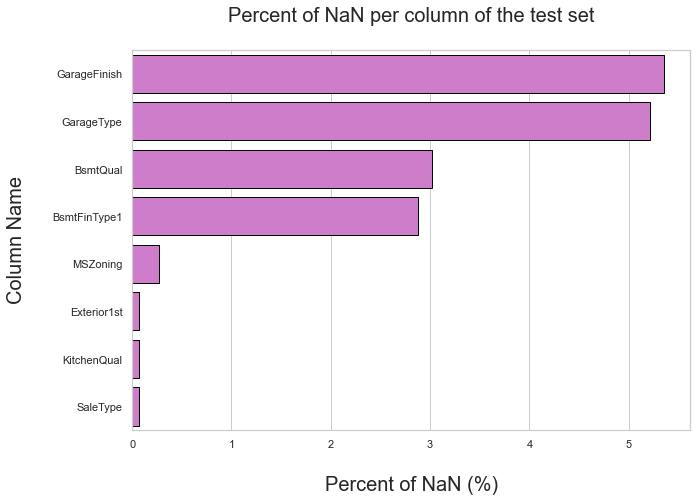

In [45]:
# Check the NaN of the test set by ploting percent of missing values per column
column_with_nan = df_test_categ.columns[df_test_categ.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(
        round(df_test_categ[i].isnull().sum() * 100 / len(df_test_categ), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)


# Define figure parameters
sns.set(rc={"figure.figsize": (10, 7)})
sns.set_style("whitegrid")

# Plot results
p = sns.barplot(x="Percent_NaN", y="Column", data=tab,
                edgecolor="black", color="orchid")
p.set_title("Percent of NaN per column of the test set\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=20)
p.set_ylabel("Column Name\n", fontsize=20)

In [48]:
# Fill the NaN of each feature by the corresponding modal class
categ_fill_null = {"GarageType": df_test_categ["GarageType"].mode().iloc[0],
                   "GarageFinish": df_test_categ["GarageFinish"].mode().iloc[0],
                   "BsmtQual": df_test_categ["BsmtQual"].mode().iloc[0],
                   "BsmtFinType1": df_test_categ["BsmtFinType1"].mode().iloc[0],
                   "MSZoning": df_test_categ["MSZoning"].mode().iloc[0],
                   "Exterior1st": df_test_categ["Exterior1st"].mode().iloc[0],
                   "KitchenQual": df_test_categ["KitchenQual"].mode().iloc[0],
                   "SaleType": df_test_categ["SaleType"].mode().iloc[0]}

df_test_categ = df_test_categ.fillna(value=categ_fill_null)


In [49]:
print(f"Training set shape (Categorical features): {df_train_categ.shape}\n")
print(f"Test set shape (Categorical features): {df_test_categ.shape}\n")

Training set shape (Categorical features): (1460, 21)

Test set shape (Categorical features): (1459, 20)



# Onehot Encoding

In [90]:
#df_train_categ.drop(["SalePrice"], axis = 1, inplace = True)

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df_train_categ)

df_train_dummies = enc.transform(df_train_categ)
df_test_dummies = enc.transform(df_test_categ)

In [91]:
df_train_categ_final = pd.DataFrame(df_train_dummies.toarray(), columns=enc.get_feature_names(df_train_categ.columns))
df_test_categ_final = pd.DataFrame(df_test_dummies.toarray(), columns=enc.get_feature_names(df_test_categ.columns))

In [95]:
df_train_categ_final.shape

(1460, 140)

In [96]:
df_test_categ_final.shape

(1459, 140)

# Merge

In [98]:
# Training set
df_train_new = pd.concat([df_train_imputed, df_train_categ_final], axis = 1)
print(f"Train set: {df_train_new.shape}")

# Test set
df_test_new = pd.concat([df_test_imputed, df_test_categ_final], axis = 1)
print(f"Test set: {df_test_new.shape}")

Train set: (1460, 155)
Test set: (1459, 154)


In [99]:
df_train_new.head()

,OverallQual,GrLivArea,YearBuilt,YearRemodAdd,TotalBsmtSF,FullBath,GarageArea,LotFrontage,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,7.00,"1,710.00","2,003.00","2,003.00",856.00,2.00,548.00,65.00,196.00,706.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
1,6.00,"1,262.00","1,976.00","1,976.00","1,262.00",2.00,460.00,80.00,0.00,978.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
2,7.00,"1,786.00","2,001.00","2,002.00",920.00,2.00,608.00,68.00,162.00,486.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,7.00,"1,717.00","1,915.00","1,970.00",756.00,1.00,642.00,60.00,0.00,216.00,...,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,8.00,"2,198.00","2,000.00","2,000.00","1,145.00",2.00,836.00,84.00,350.00,655.00,...,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00


# New Features

In [104]:
# Convert Year of construction to the Age of the house since the construction
df_train_new["AgeSinceConst"] = (df_train_new["YearBuilt"].max() - df_train_new["YearBuilt"])

df_test_new["AgeSinceConst"] = (df_test_new["YearBuilt"].max() - df_test_new["YearBuilt"])

# Drop "YearBuilt"
df_train_new.drop(["YearBuilt"], axis=1, inplace=True)
df_test_new.drop(["YearBuilt"], axis=1, inplace=True)

In [105]:
# Convert Year of remodeling to the Age of the house since the remodeling
df_train_new["AgeSinceRemod"] = (df_train_new["YearRemodAdd"].max() - df_train_new["YearRemodAdd"])

df_test_new["AgeSinceRemod"] = (df_test_new["YearRemodAdd"].max() - df_test_new["YearRemodAdd"])

# Drop "YearRemodAdd"
df_train_new.drop(["YearRemodAdd"], axis=1, inplace=True)
df_test_new.drop(["YearRemodAdd"], axis=1, inplace=True)

# Skewed Features?

In [106]:
continuous_features = ["OverallQual", "TotalBsmtSF", "GrLivArea",
                       "FullBath", "GarageArea","MasVnrArea", "Fireplaces", "AgeSinceConst", "AgeSinceRemod"]
df_skew_verify = df_train_new.loc[:, continuous_features]
df_skew_verify.head()

,OverallQual,TotalBsmtSF,GrLivArea,FullBath,GarageArea,MasVnrArea,Fireplaces,AgeSinceConst,AgeSinceRemod
0,7.00,856.00,"1,710.00",2.00,548.00,196.00,0.00,7.00,7.00
1,6.00,"1,262.00","1,262.00",2.00,460.00,0.00,1.00,34.00,34.00
2,7.00,920.00,"1,786.00",2.00,608.00,162.00,1.00,9.00,8.00
3,7.00,756.00,"1,717.00",1.00,642.00,0.00,1.00,95.00,40.00
4,8.00,"1,145.00","2,198.00",2.00,836.00,350.00,1.00,10.00,10.00


In [107]:
df_skew_verify = df_train_new.loc[:, continuous_features]

df_skew_verify

,OverallQual,TotalBsmtSF,GrLivArea,FullBath,GarageArea,MasVnrArea,Fireplaces,AgeSinceConst,AgeSinceRemod
0,7.00,856.00,"1,710.00",2.00,548.00,196.00,0.00,7.00,7.00
1,6.00,"1,262.00","1,262.00",2.00,460.00,0.00,1.00,34.00,34.00
2,7.00,920.00,"1,786.00",2.00,608.00,162.00,1.00,9.00,8.00
3,7.00,756.00,"1,717.00",1.00,642.00,0.00,1.00,95.00,40.00
4,8.00,"1,145.00","2,198.00",2.00,836.00,350.00,1.00,10.00,10.00
...,...,...,...,...,...,...,...,...,...
1455,6.00,953.00,"1,647.00",2.00,460.00,0.00,1.00,11.00,10.00
1456,6.00,"1,542.00","2,073.00",2.00,500.00,119.00,2.00,32.00,22.00
1457,7.00,"1,152.00","2,340.00",2.00,252.00,0.00,2.00,69.00,4.00
1458,5.00,"1,078.00","1,078.00",1.00,240.00,0.00,0.00,60.00,14.00


In [ ]:
# Select features with absolute Skew higher than 0.5
skew_ft = []

for i in continuous_features:
    # list of skew for each corresponding feature
    skew_ft.append(abs(df_skew_verify[i].skew()))

df_skewed = pd.DataFrame({"Columns": continuous_features, "Abs_Skew": skew_ft})


sk_features = df_skewed[df_skewed["Abs_Skew"] > 0.5]["Columns"].tolist()
print(f"List of skewed features: {sk_features}")